In [4]:
import pandas as pd
DTYPES = {'Mushroom': str }
df = pd.read_csv('mushroom_cleaned.csv', sep = ',', dtype = DTYPES)
df.rename(columns={'class': 'Mushroom'}, inplace = True)
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,Mushroom
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
Mushroom             int64
dtype: object

In [6]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
Mushroom           0
dtype: int64

In [7]:
df.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
Mushroom              2
dtype: int64

In [8]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,Mushroom
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [14]:
X = df[['gill-color', 'stem-height', 'stem-width']]
# Queremos fazer os diagnósticos
y = df['Mushroom']
# Para uma rede neural a saída deve ser numérica
# y = y.map({'D':1, 'S':0})

In [25]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# Treina com 80%
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(random_state=1, max_iter=2000)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

Acurácia: 0.64
Precisão: 0.64
Matriz de Confusão


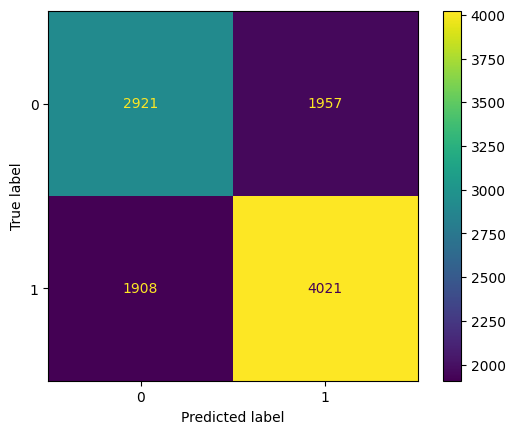

In [27]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão
precision = precision_score(y_test, y_pred, average = 'macro',zero_division = 0.0)
print("Precisão: {:.2f}".format(precision))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()